In [6]:
import pandas as pd
import numpy as np
import nltk

In [7]:
!pip install wordcloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.13 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/narendramodi_tweets.csv')

In [9]:
df.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


# Bag of Word Analysis - 
#### frequency of each word

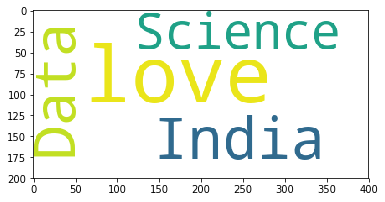

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text='I love India I Love Data Science'
wc=WordCloud(background_color='white').generate(text)
plt.imshow(wc)

In [11]:
x = ['a','c','d']
x

['a', 'c', 'd']

In [12]:
''.join(x)

'acd'

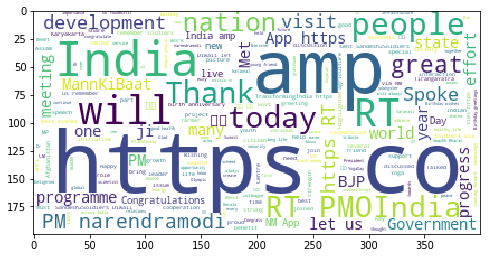

In [13]:
plt.figure(figsize=(8,8))
text=' '.join(df['text'])
wc=WordCloud(background_color='white').generate(text)
plt.imshow(wc)

In [14]:
# In the above there are some words which are not required

In [15]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
len(stopwords)

179

In [17]:
custom_stopwords=['RT','amp','https']

In [18]:
stopwords.extend(custom_stopwords)

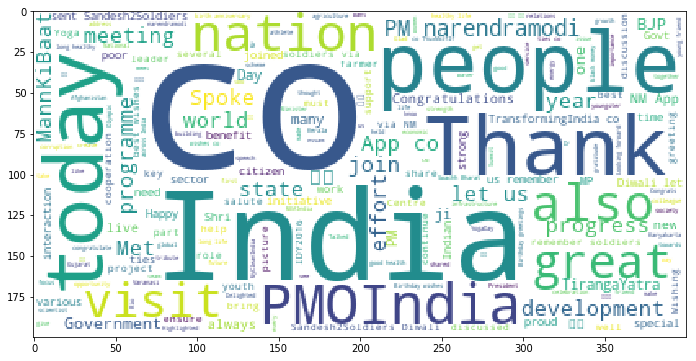

In [19]:
plt.figure(figsize=(12,6))
wc=WordCloud(background_color='white',stopwords=stopwords).generate(text)  
# stopwords are used to remove those words which are not required
plt.imshow(wc)

# Text Cleaning

- Converting every character to lower case
- Remove Special Characters and junk values
- Remove stopwords
- Identify root of the words(stemming,lemmatization)

-Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations. eg: Studies --> Studi

-Lemmatization, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma.Another important difference to highlight is that a lemma is the base form of all its inflectional forms, whereas a stem isn’t ,eg: Studies --> Study

In [20]:
docs = df['text'].str.lower()

In [21]:
text=pd.Series(['This sentence has numbers 123','this sentence has special characters &^%'])
print(text.str.replace('[a-zA-Z]','-'))
# always use str when using a regular expression
print(text.str.replace('[0-9]',''))
print(text.str.replace('[^a-zA-Z ]','')) # ^ is used to retain a-zA-Z and remove everything

0               ---- -------- --- ------- 123
1    ---- -------- --- ------- ---------- &^%
dtype: object
0                  This sentence has numbers 
1    this sentence has special characters &^%
dtype: object
0               This sentence has numbers 
1    this sentence has special characters 
dtype: object


In [22]:
docs=df['text'].str.lower()
docs = docs.str.replace('[^a-z@# ]','')  # retain alphabets, @ , #, spaces and remove everything
docs.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [23]:
docs_clean = []
for doc in docs:
    words = doc.split(' ')
    # words = nltk.word_tokenize(doc) # another method
    print(words)
    print('------------')

['the', 'presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'amp', 'the', 'efforts', 'towards', '#transformingindia']
------------
['rashtrapati', 'jis', 'address', 'to', 'both', 'houses', 'of', 'parliament', 'was', 'indepth', 'amp', 'extensive', 'do', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
------------
['rt', '@pmoindia', 'empowering', 'the', 'marginalised', 'httpstcowwsqgwdk']
------------
['rt', '@pmoindia', 'commitment', 'to', 'welfare', 'of', 'farmers', 'httpstcopaafrfmrc']
------------
['rt', '@pmoindia', 'improving', 'the', 'quality', 'of', 'life', 'for', 'the', 'poor', 'httpstcougmvkz']
------------
['rt', '@pmoindia', 'financial', 'inclusion', 'for', 'poverty', 'alleviation', 'httpstcoxtzyhhte']
------------
['rt', '@rashtrapatibhvn', 'the', 'fourdecade', 'old', 'demand', 'of', 'onerankonepension', 'orop', 'of', 'our', 'armed', 'forces', 'veterans', 'has', 'been', 'fulfilled', '#presidentmu']
------------
['rt',

['rt', '@smritiirani', 'i', 'sent', 'my', '#sandeshsoldiers', 'this', 'diwali', 'let', 'us', 'all', 'remember', 'our', 'soldiers', 'via', 'nm', 'app', 'httpstcoexttxcbqf', 'httpstco']
------------
['rt', '@harsimratbadal', 'i', 'sent', 'my', '#sandeshsoldiers', 'this', 'diwali', 'let', 'us', 'all', 'remember', 'our', 'soldiers', 'via', 'nm', 'app', 'httpstcovadaumkyb', 'https']
------------
['rt', '@boxervijender', '', '', '', '', '', '', '', '', '', '', '', '#sandeshsoldiers', '#happydiwali', 'httpstcobuewidyl']
------------
['rt', '@vasundharabjp', 'i', 'sent', 'my', '#sandeshsoldiers', 'this', 'diwali', 'let', 'us', 'all', 'remember', 'our', 'soldiers', 'via', 'nm', 'app', 'httpstcojuvotrrlz', 'httpst']
------------
['rt', '@mygovindia', '#sandeshsoldiers', 'by', 'uday', 'kumar', 'httpstcotskdghk']
------------
['rt', '@mygovindia', '#sandeshsoldiers', '', 'srividya', 'misra', 'httpstcohrjxpwjma']
------------
['rt', '@mygovindia', '#sandeshsoldiers', '', 'vipul', 'singh', 'httpstco

------------
['successful', 'testing', 'of', 'scramjet', 'rocket', 'engine', 'is', 'a', 'testimony', 'to', 'the', 'hardwork', 'amp', 'excellence', 'of', 'our', 'scientists', 'congratulations', 'to', '@isro']
------------
['on', 'kashmir', 'all', 'parties', 'spoke', 'in', 'one', 'voice', 'amp', 'at', 'the', 'core', 'of', 'this', 'is', 'the', 'spirit', 'of', 'ekta', 'amp', 'mamata', 'which', 'guides', 'us', '#mannkibaat']
------------
['on', 'kashmir', 'reaffirmed', 'that', 'any', 'life', 'lost', 'be', 'it', 'of', 'a', 'youngster', 'or', 'security', 'personnel', 'is', 'indias', 'loss', 'amp', 'we', 'all', 'feel', 'deeply', 'anguished']
------------
['the', 'power', 'of', 'consensus', 'can', 'do', 'wonders', 'for', 'the', 'nation', 'delighted', 'to', 'talk', 'about', 'gst', 'amp', 'how', 'all', 'parties', 'came', 'together', 'for', 'larger', 'national', 'good']
------------
['shared', 'a', 'remarkable', 'story', 'of', 'an', 'octogenarian', 'retired', 'teacher', 'who', 'contributed', 'rs',

------------
['tributes', 'to', 'shri', 'pv', 'narasimha', 'rao', 'on', 'his', 'birth', 'anniversary', 'he', 'led', 'india', 'at', 'a', 'crucial', 'time', 'amp', 'his', 'leadership', 'was', 'both', 'notable', 'amp', 'vital']
------------
['rt', '@pmoindia', 'the', 'youth', 'of', 'this', 'nation', 'believes', 'in', 'development', 'and', 'it', 'is', 'development', 'that', 'can', 'solve', 'peoples', 'problems', 'pm', '@narendramodi', 'to']
------------
['rt', '@pmoindia', 'not', 'passing', 'gst', 'is', 'injustice', 'to', 'the', 'poor', 'and', 'some', 'states', 'in', 'particular', 'those', 'in', 'the', 'rajya', 'sabha', 'should', 'understand', 'this', 'pm', 't']
------------
['rt', '@pmoindia', 'our', 'first', 'cabinet', 'decision', 'was', 'on', 'black', 'money', 'at', 'g', 'forum', 'also', 'this', 'issue', 'was', 'raised', 'for', 'the', 'first', 'time', 'amp', 'consensus', 'formed']
------------
['rt', '@pmoindia', 'mahatma', 'gandhi', 'spoke', 'of', 'empowering', 'the', 'poor', 'poor', '

------------
['rt', '@tussaudshk', 'indian', 'prime', 'minister', 'narendra', 'modi', 'joins', 'world', 'leaders', 'at', 'madame', 'tussauds', 'httpstcoscbeobdgj', 'via', '@youtube']
------------
['wishing', 'the', 'cm', 'of', 'meghalaya', 'dr', 'mukul', 'sangma', 'on', 'his', 'birthday', 'may', 'almighty', 'bless', 'him', 'with', 'a', 'long', 'life', 'that', 'is', 'full', 'of', 'joy', 'and', 'great', 'health']
------------
['birthday', 'wishes', 'to', 'my', 'good', 'friend', '@ncbn', 'garu', 'a', 'leader', 'who', 'is', 'very', 'passionate', 'about', 'andhra', 'pradeshs', 'progress', 'praying', 'for', 'his', 'long', 'life']
------------
['recalled', 'atal', 'jis', 'vision', 'for', 'jampk', 'amp', 'highlighted', 'the', 'scope', 'of', 'development', 'in', 'jampk', 'particularly', 'in', 'areas', 'like', 'tourism', 'httpstcokutecqmre']
------------
['at', 'the', 'large', 'public', 'meeting', 'in', 'katra', 'remembered', 'mufti', 'sahab', 'amp', 'spoke', 'about', 'centres', 'unwavering', 'c

In [24]:
x=['of','india','we','the','soldiers']
[word for word in x if word not in stopwords]


['india', 'soldiers']

In [25]:
x=['of','india','we','the','soldiers']
stemmer = nltk.stem.PorterStemmer()
stemmer.stem('playing') 
# removes ing - but there is a chance that the meaning gets affected


'play'

In [26]:
stemmer.stem('organization')     # not preferable because it loses its meaning in this case

'organ'

In [27]:
docs_clean=[]
for doc in docs.head():
    words = doc.split(' ')
    words_clean = [ stemmer.stem(w) for w in words if w not in stopwords]
    text_clean= ' '.join(words_clean)
    docs_clean.append(text_clean)
    #print(doc)
    #print(words)
    #print(words_clean)
    #print('--------------')

In [28]:

docs=df['text'].str.lower().str.replace('[^a-z@# ]','') 
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

# Document Term Matrix

- In text mining, it is important to create the document-term matrix (DTM) of the corpus we are interested in. A DTM is basically a matrix, with documents designated by rows and words by columns, that the elements are the counts or the weights (usually by tf-idf). Subsequent analysis is usually based creatively on DTM.

#### CountVectorizer

Convert a collection of text documents to a matrix of token counts
This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.
If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature
selection then the number of features will be equal to the vocabulary size found by analyzing the data.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=4, ngram_range=(2,2)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)
dtm
    

<3220x606 sparse matrix of type '<class 'numpy.int64'>'
	with 4402 stored elements in Compressed Sparse Row format>

In [30]:
len(stopwords)

181

In [31]:
nrows = dtm.shape[0]
ncols = dtm.shape[1]
total_values = nrows * ncols
sparsity = (total_values - dtm.size)/total_values*100
sparsity

99.77440911793043

In [32]:
df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
df_dtm

,across india,across nation,across world,act east,address joint,address public,address ralli,advani ji,adventur awarde,agricultur sector,...,world leader,xi jinp,year bring,year come,yoga day,yoga practic,yogaday celebr,yogaday http,young friend,zay al
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_dtm.shape

(3220, 606)

### bag of word Analysis

In [34]:
df_dtm.sum().sort_values(ascending=False)

pm narendramodi              77
let us                       59
nm app                       48
diwali let                   43
sent sandeshsoldi            43
us rememb                    42
via nm                       41
rememb soldier               41
sandeshsoldi diwali          41
soldier via                  41
best wish                    36
look forward                 34
birth anniversari            33
long life                    30
birthday wish                30
good health                  28
long healthi                 28
healthi life                 28
birthday greet               26
swachh bharat                22
black money                  22
across india                 22
young friend                 21
pray long                    21
bless long                   20
greet peopl                  20
paid tribut                  18
pmoindia pm                  18
west bengal                  17
new height                   17
                             ..
indian a

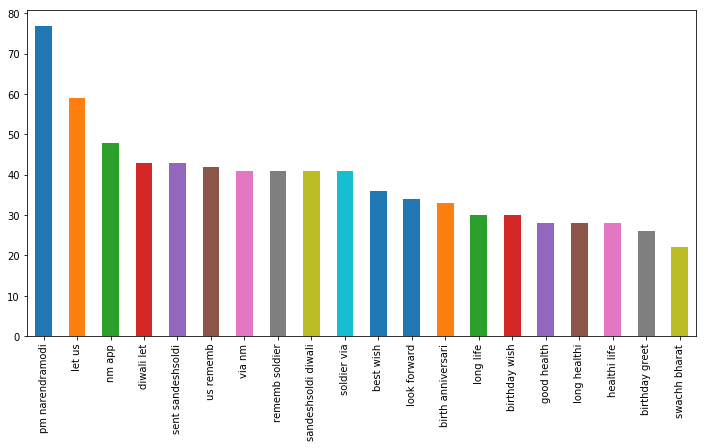

In [35]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(12,6))

In [36]:
imdb=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/imdb_sentiment.csv')

In [37]:
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [38]:
docs=imdb['review'].str.lower().str.replace('[^a-z ]','') 
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend([])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0      slowmov aimless movi distress drift young man  
1    sure lost  flat charact audienc nearli half wa...
2    attempt arti black  white clever camera angl m...
3                            littl music anyth speak  
4    best scene movi gerardo tri find song keep run...
Name: review, dtype: object

In [39]:
# splitting of Data

from sklearn.model_selection import train_test_split
train,test = train_test_split(docs_clean,test_size=0.2,random_state=100)

vectorizer = CountVectorizer()
vectorizer.fit(train)
dtm_train= vectorizer.transform(train)
dtm_test = vectorizer.transform(test)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape,df_dtm_test.shape

((598, 2083), (150, 2083))

In [40]:
train_y = imdb.iloc[train.index]['sentiment']
test_y = imdb.iloc[test.index]['sentiment']

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(n_estimators=300,random_state=100)
model_rf.fit(df_dtm_train,train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [42]:
pred_class=model_rf.predict(df_dtm_test)   # Prediction

In [54]:
pred_class

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
accuracy_score(test_y,pred_class)

0.7

In [44]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
nb_clfr=GaussianNB()
nb_clfr.fit(df_dtm_train,train_y)
pred_class=nb_clfr.predict(df_dtm_test)
accuracy_score(test_y,pred_class)

0.5933333333333334

In [45]:
nb_clfr=MultinomialNB()
nb_clfr.fit(df_dtm_train,train_y)
pred_class=nb_clfr.predict(df_dtm_test)
accuracy_score(test_y,pred_class)

0.7733333333333333

In [46]:
df_dtm_train.sum().sort_values().tail()

charact     45
bad         53
one         61
film       141
movi       165
dtype: int64

(array([585.,  10.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

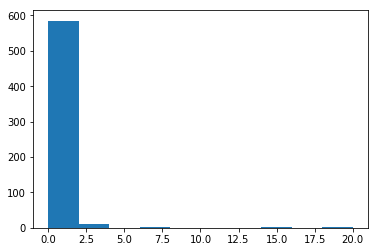

In [47]:
plt.hist(df_dtm_train['movi'].sort_values(ascending=False))

# TF - IDF Vectorization
Term Frequency - Inverse Document Frequency

Convert a collection of raw documents to a matrix of TFIDF features.


Google has already been using TF*IDF (or TF-IDF, TFIDF, TF.IDF, Artist formerly known as Prince) as a ranking factor for your content for a long time, as the search engine seems to focus more on term frequency rather than on counting keywords. While the visual complexity of the algorithm might turn a lot of people off, it is important to recognize that understanding TF*IDF is not as significant as knowing how it works.

TF*IDF is used by search engines to better understand content which is undervalued. For example, if you’d want to search a term “Coke” on Google, this is how Google can figure out if a page titled “COKE” is about:

a) Coca-Cola.
b) Cocaine.
c) A solid, carbon-rich residue derived from the distillation of crude oil.
d) A county in Texas.


What is TF*IDF?

TF*IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word or term has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TF*IDF weight of that term.

Put simply, the higher the TF*IDF score (weight), the rarer the term and vice versa.

The TF*IDF algorithm is used to weigh a keyword in any content and assign the importance to that keyword based on the number of times it appears in the document. More importantly, it checks how relevant the keyword is throughout the web, which is referred to as corpus.

For a term t in a document d, the weight Wt,d of term t in document d is given by:

Wt,d = TFt,d log (N/DFt)

Where:

TFt,d is the number of occurrences of t in document d.
DFt is the number of documents containing the term t.
N is the total number of documents in the corpus.
All right. Don’t panic if you feel a headache coming on.

Let’s define this more concretely.

TF*IDF Defined
The TF (term frequency) of a word is the frequency of a word (i.e. number of times it appears) in a document. When you know it, you’re able to see if you’re using a term too much or too little.

For example, when a 100 word document contains the term “cat” 12 times, the TF for the word ‘cat’ is

TFcat = 12/100 i.e. 0.12

The IDF (inverse document frequency) of a word is the measure of how significant that term is in the whole corpus.

For example, say the term “cat” appears x amount of times in a 10,000,000 million document-sized corpus (i.e. web). Let’s assume there are 0.3 million documents that contain the term “cat”, then the IDF (i.e. log {DF}) is given by the total number of documents (10,000,000) divided by the number of documents containing the term “cat” (300,000).

IDF (cat) = log (10,000,000/300,000) = 1.52

∴ Wcat = (TF*IDF) cat = 0.12 * 1.52 = 0.182

Now that you have this figured out (right?), let’s look at how this can benefit you.

How you can benefit from using TF*IDF
Gather words. Write your content. Run a TF*IDF report for your words and get their weights. The higher the numerical weight value, the rarer the term. The smaller the weight, the more common the term. Compare all the terms with high TF*IDF weights with respect to their search volumes on the web. Select those with higher search volumes and lower competition. Work smart.

A good rule of thumb is, the more your content “makes sense” to the user, the more weight it is assigned by the search engine. With words having a high TF*IDF weight in your content, your content will always be among the top search results, so you can:

stop worrying about using the stop-words,
successfully hunt words with higher search volumes and lower competition,
be sure to have words that make your content unique and relevant to the user, etc.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

train,test = train_test_split(docs_clean,test_size=0.2,random_state=100)

vectorizer = TfidfVectorizer()
vectorizer.fit(train)
dtm_train= vectorizer.transform(train)
dtm_test = vectorizer.transform(test)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape,df_dtm_test.shape

train_y = imdb.iloc[train.index]['sentiment']
test_y = imdb.iloc[test.index]['sentiment']

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(n_estimators=300,random_state=100)
model_rf.fit(df_dtm_train,train_y)
pred_class=model_rf.predict(df_dtm_test)   # Prediction
accuracy_score(test_y,pred_class)

0.7

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
nb_clfr=GaussianNB()
nb_clfr.fit(df_dtm_train,train_y)
pred_class=nb_clfr.predict(df_dtm_test)
accuracy_score(test_y,pred_class)

0.6066666666666667

In [50]:
nb_clfr=MultinomialNB()
nb_clfr.fit(df_dtm_train,train_y)
pred_class=nb_clfr.predict(df_dtm_test)
accuracy_score(test_y,pred_class)

0.8